In [129]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## EDA for Waste Classification Data

In [3]:
train_path = '../../Data_Models/DATASET/TRAIN'
test_path = '../../Data_Models/DATASET/TEST'


In [4]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        img = tf.keras.preprocessing.image.load_img(file)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data_waste_seg=pd.DataFrame({'image': x_data,'label': y_data})
data_waste_seg.head()

image label
0  [[[123.0, 120.0, 103.0], [122.0, 119.0, 102.0]...     R
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R
2  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R
3  [[[169.0, 174.0, 204.0], [154.0, 161.0, 190.0]...     R
4  [[[254.0, 254.0, 246.0], [254.0, 254.0, 246.0]...     R

In [5]:
data_waste_seg['label'].value_counts()

O    12565
R     9999
Name: label, dtype: int64

In [16]:
x, y, c, max_pix, min_pix =  [], [], [], [], []
for image in data_waste_seg['image']:
    shape = image.shape
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    max_pix.append(np.max(image))
    min_pix.append(np.min(image))
data_waste_seg['height'], data_waste_seg['width'], data_waste_seg['color_channels'], data_waste_seg['max_pixel'], data_waste_seg['min_pixel'] = x, y, c, max_pix, min_pix
data_waste_seg.head()

image label  width  height  \
0  [[[123.0, 120.0, 103.0], [122.0, 119.0, 102.0]...     R    300     168   
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R    231     218   
2  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...     R    225     225   
3  [[[169.0, 174.0, 204.0], [154.0, 161.0, 190.0]...     R    380     133   
4  [[[254.0, 254.0, 246.0], [254.0, 254.0, 246.0]...     R    284     177   

   color_channels  max_pixel  min_pixel  
0               3      255.0       19.0  
1               3      255.0        0.0  
2               3      255.0        0.0  
3               3      255.0        0.0  
4               3      255.0        0.0

Text(0.5, 1.0, 'Class Distribution')

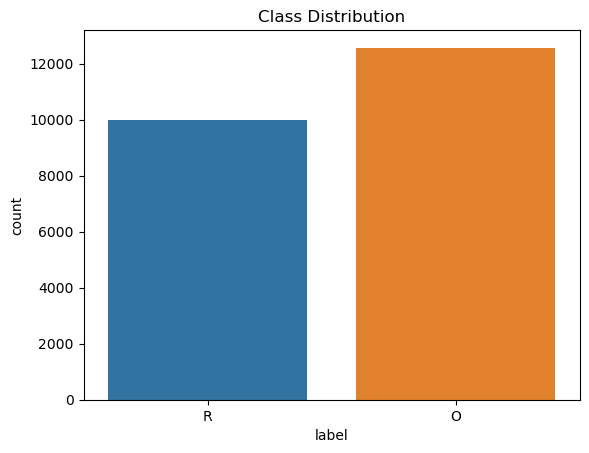

In [17]:
import seaborn as sns

sns.countplot(data=data_waste_seg, x='label').set_title('Class Distribution')

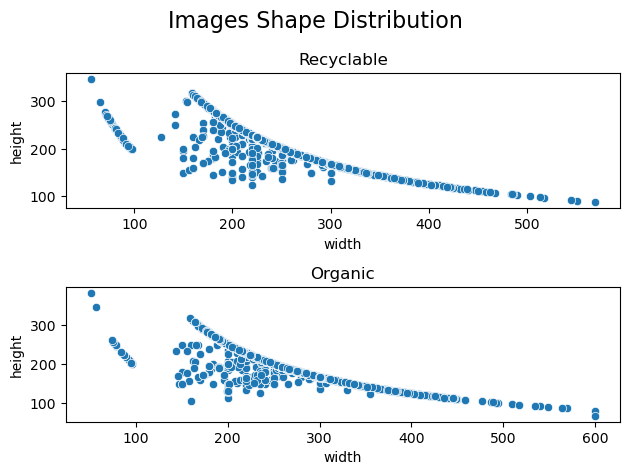

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
fig.suptitle('Images Shape Distribution', fontsize=16)
sns.scatterplot(data=data_waste_seg[data_waste_seg['label'] == 'R'], x='width', y='height', ax=ax[0])
sns.scatterplot(data=data_waste_seg[data_waste_seg['label'] == 'O'], x='width', y='height', ax=ax[1])
ax[0].set_title('Recyclable')
ax[1].set_title('Organic')
fig.tight_layout()

/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/927268982.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_waste_seg.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/927268982.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_waste_seg.mean()['height']


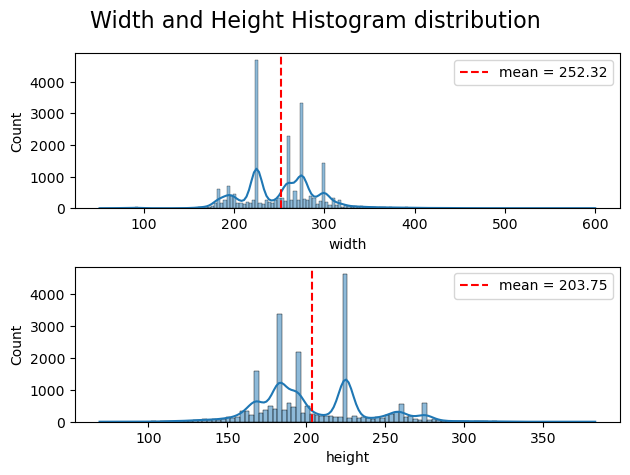

In [19]:
fig, ax = plt.subplots(2)
fig.suptitle('Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_waste_seg, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_waste_seg, x='height', ax=ax[1], kde=True)
mean_width = data_waste_seg.mean()['width']
mean_height = data_waste_seg.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

We can determine the target size to which we want to modify all the images, so that there is less distortion while resizing. for example target size can be (200, 250) or (225, 225)

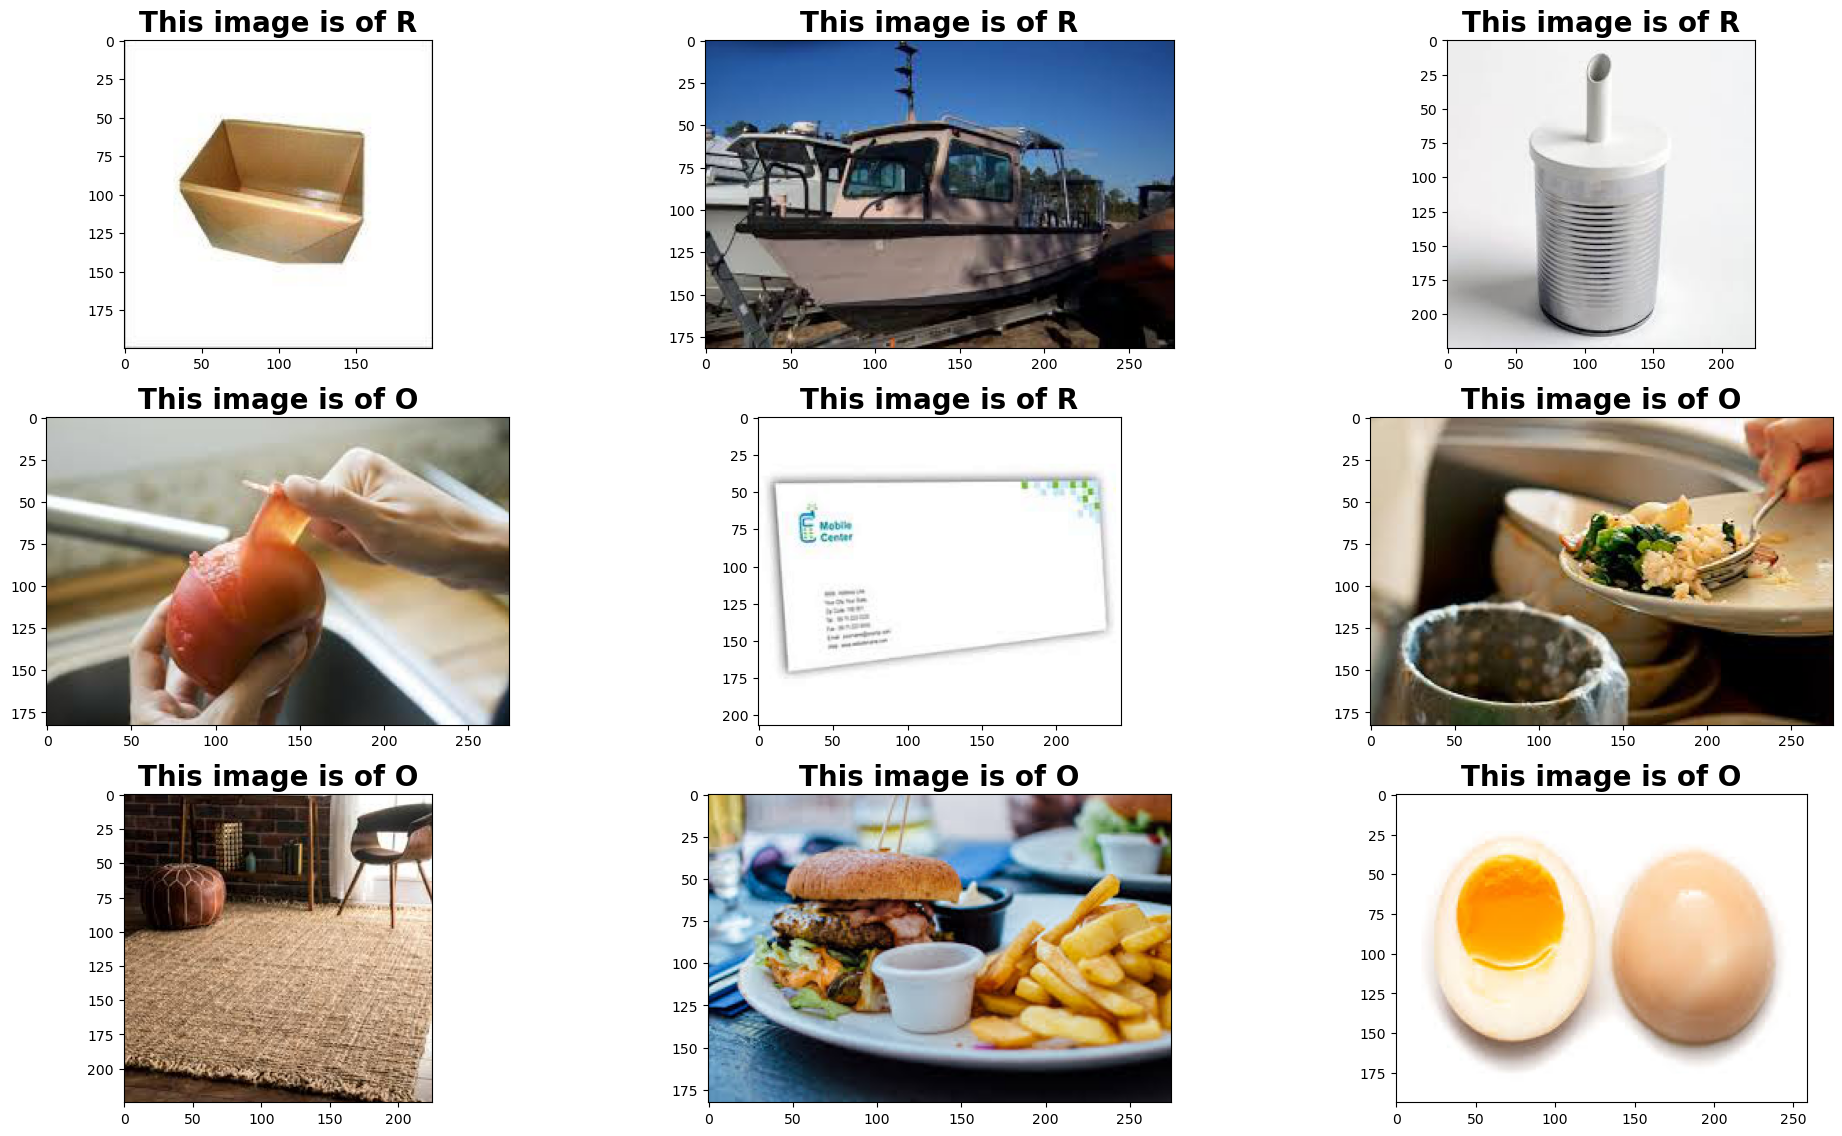

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(22000)
    plt.title('This image is of {0}'.format(data_waste_seg.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(tf.keras.preprocessing.image.array_to_img(data_waste_seg.image[index]))
    plt.tight_layout()

## EDA for Trashnet 

In [21]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data = [] 
y_data = [] 
train_path = '../../Data_Models/Trash Net'
for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        img = tf.keras.preprocessing.image.load_img(file)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data_trashnet=pd.DataFrame({'image': x_data,'label': y_data})
data_trashnet.head()

image  label
0  [[[236.0, 232.0, 220.0], [236.0, 232.0, 220.0]...  paper
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper
2  [[[240.0, 240.0, 238.0], [240.0, 240.0, 238.0]...  paper
3  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper
4  [[[240.0, 244.0, 245.0], [240.0, 244.0, 245.0]...  paper

In [22]:
x, y, c, max_pix, min_pix =  [], [], [], [], []
for image in data_trashnet['image']:
    shape = image.shape
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    max_pix.append(np.max(image))
    min_pix.append(np.min(image))
data_trashnet['height'], data_trashnet['width'], data_trashnet['color_channels'], data_trashnet['max_pixel'], data_trashnet['min_pixel'] = x, y, c, max_pix, min_pix
data_trashnet.head()

image  label  height  width  \
0  [[[236.0, 232.0, 220.0], [236.0, 232.0, 220.0]...  paper     384    512   
1  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper     384    512   
2  [[[240.0, 240.0, 238.0], [240.0, 240.0, 238.0]...  paper     384    512   
3  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...  paper     384    512   
4  [[[240.0, 244.0, 245.0], [240.0, 244.0, 245.0]...  paper     384    512   

   color_channels  max_pixel  min_pixel  
0               3      255.0        0.0  
1               3      255.0        0.0  
2               3      255.0        0.0  
3               3      255.0       24.0  
4               3      255.0        0.0

In [2]:
data_trashnet['color_channels'].value_counts()

NameError: name 'data_trashnet' is not defined

Text(0.5, 1.0, ' Trashnet Class Distribution')

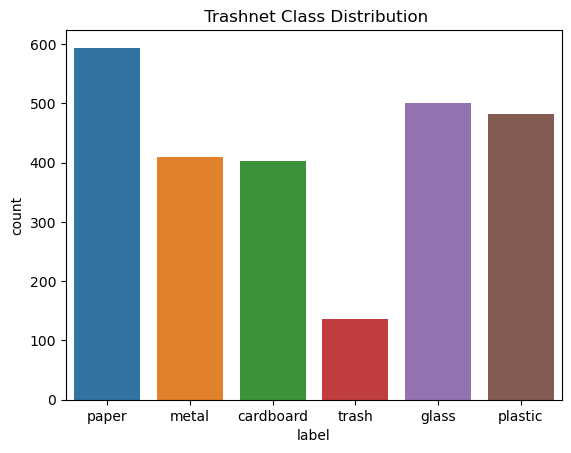

In [23]:
sns.countplot(data=data_trashnet, x='label').set_title(' Trashnet Class Distribution')


/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/1729760121.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_trashnet.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_7063/1729760121.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_trashnet.mean()['height']


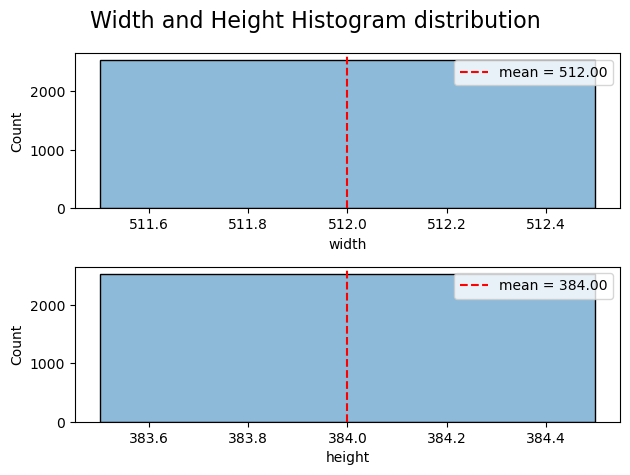

In [24]:
fig, ax = plt.subplots(2)
fig.suptitle('Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_trashnet, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_trashnet, x='height', ax=ax[1], kde=True)
mean_width = data_trashnet.mean()['width']
mean_height = data_trashnet.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

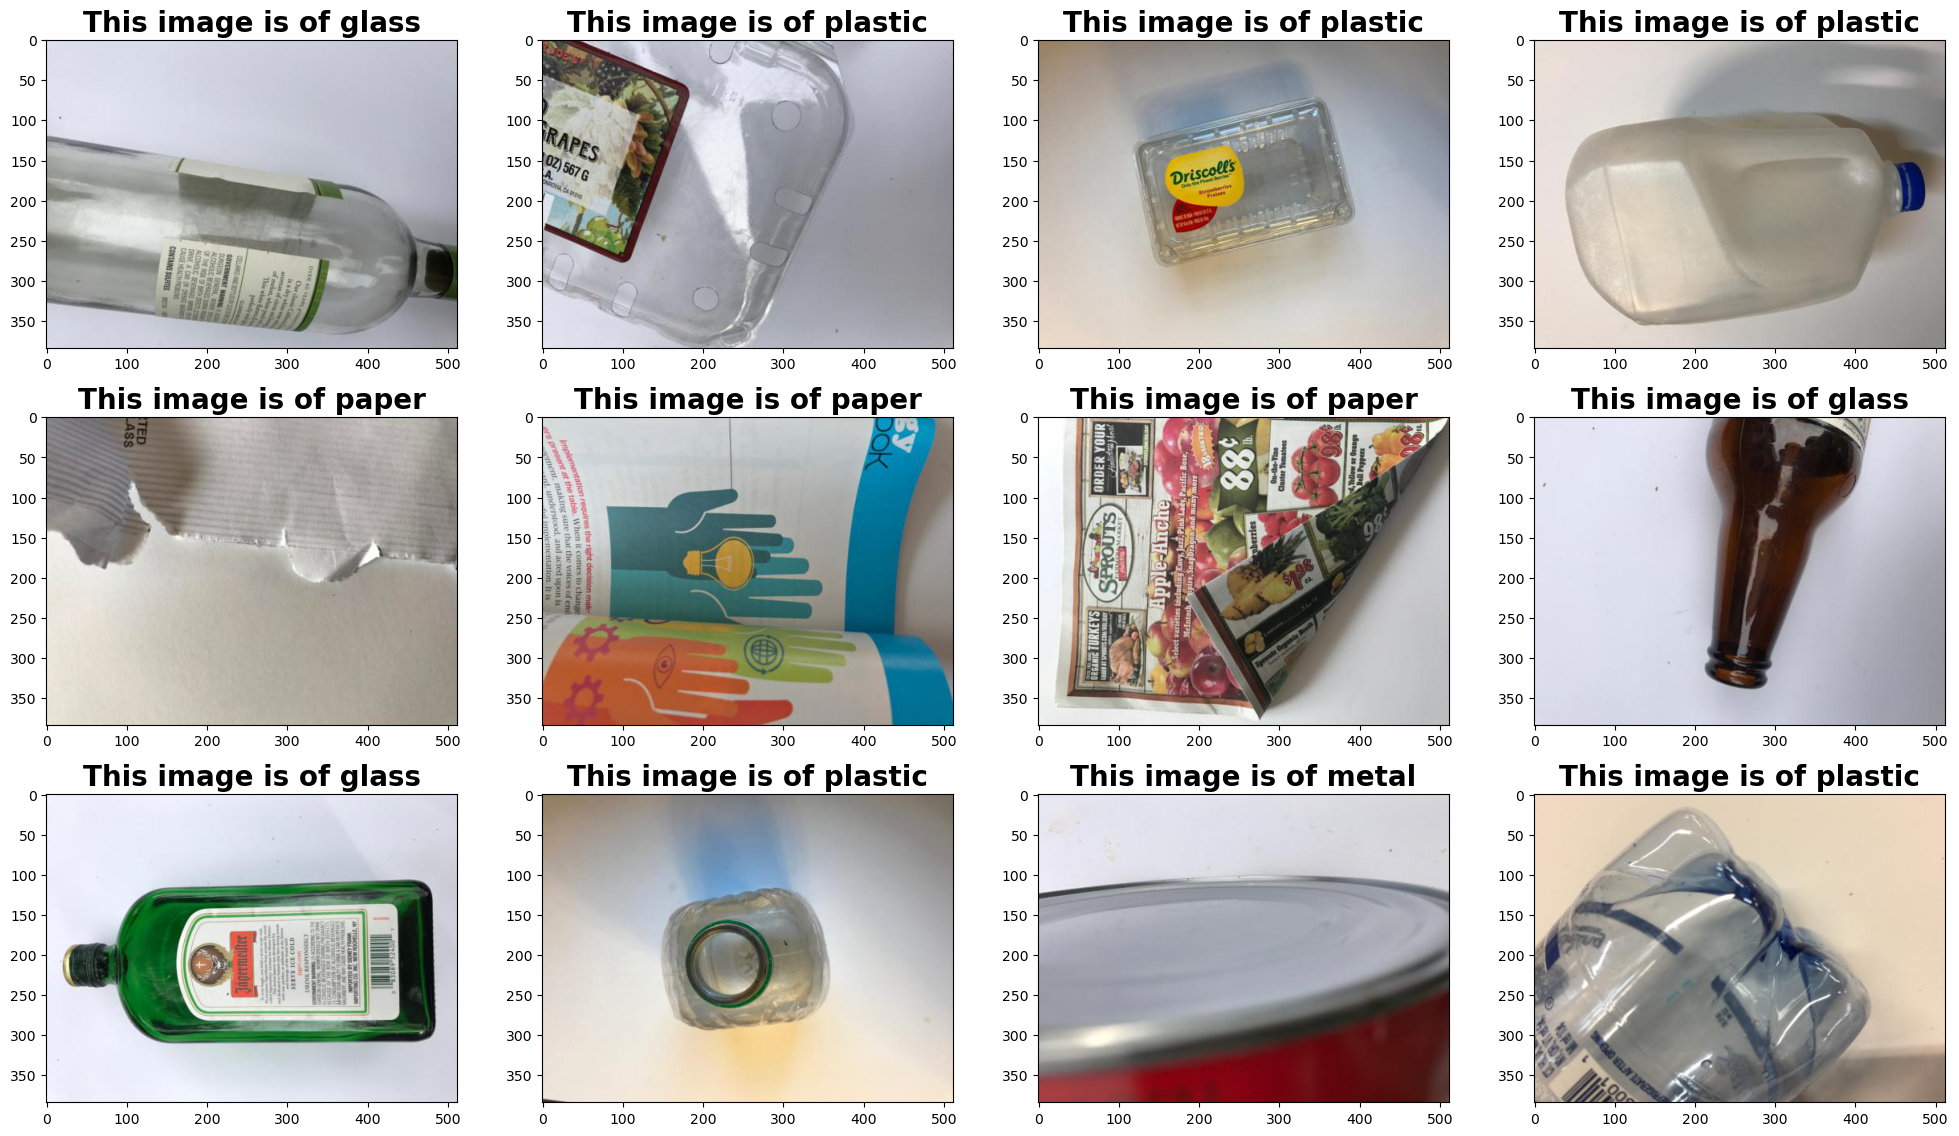

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(12):
    plt.subplot(4,4,(i%12)+1)
    index=np.random.randint(2500)
    plt.title('This image is of {0}'.format(data_trashnet.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(tf.keras.preprocessing.image.array_to_img(data_trashnet.image[index]))
    plt.tight_layout()

## EDA for Trash Box


In [1]:
print('hello world')

hello world


In [9]:
from glob import glob
import tensorflow as tf
import numpy as np
import pandas as pd
x_data_shape = [] 
y_data = [] 
train_path = '../../Data_Models/TrashBox_train_set/'
for category in glob(train_path+'/*'):
    for file in glob(category+'/*'):
        try :
            img = tf.keras.preprocessing.image.load_img(file)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            x_data_shape.append(img_array.shape) 
            y_data.append(category.split("/")[-1])
        except: 
            print(f'file name is {file}')
        
        
data_trashbox=pd.DataFrame({'image_shape': x_data_shape,'label': y_data})
data_trashbox.head()

/Users/murali/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


file name is ../../Data_Models/TrashBox_train_set/paper/paper 2273.jpg
file name is ../../Data_Models/TrashBox_train_set/cardboard/cardboard 1075.jpg
file name is ../../Data_Models/TrashBox_train_set/e-waste/e-waste 1719.jpg


image_shape  label
0  (340, 340, 3)  paper
1  (406, 340, 3)  paper
2  (384, 512, 3)  paper
3  (511, 340, 3)  paper
4  (300, 300, 3)  paper

Can't Store all the pixel values because the kernal was crashing so just stored the shape of the image instead of all pixel values. There are also some corrupted files which are 

file name is ../../Data_Models/TrashBox_train_set/paper/paper 2273.jpg 

file name is ../../Data_Models/TrashBox_train_set/cardboard/cardboard 1075.jpg

file name is ../../Data_Models/TrashBox_train_set/e-waste/e-waste 1719.jpg

when we use data for training we will remove them. Because we are not storing the pixel values we shall not be calculating max and min pixels also. we will just extract width, height and color_channels from image_shape

In [13]:
x, y, c =  [], [], []
for shape in data_trashbox['image_shape']:
    x.append(shape[0])
    y.append(shape[1])
    c.append(shape[2])
    
data_trashbox['height'], data_trashbox['width'], data_trashbox['color_channels']= x, y, c
data_trashbox.head()

image_shape  label  height  width  color_channels
0  (340, 340, 3)  paper     340    340               3
1  (406, 340, 3)  paper     406    340               3
2  (384, 512, 3)  paper     384    512               3
3  (511, 340, 3)  paper     511    340               3
4  (300, 300, 3)  paper     300    300               3

In [14]:
data_trashbox['color_channels'].value_counts()

3    14279
Name: color_channels, dtype: int64

Text(0.5, 1.0, ' TrashBox Class Distribution')

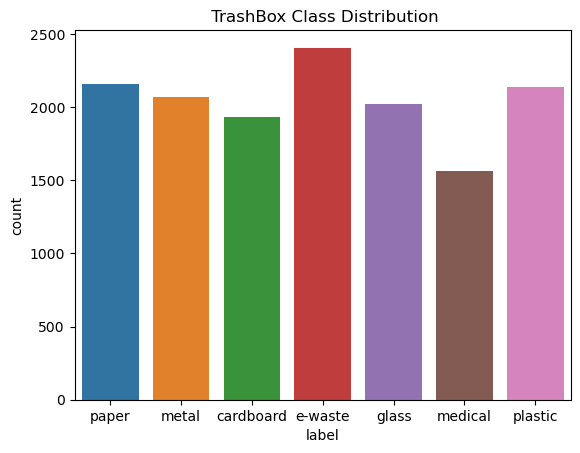

In [17]:
sns.countplot(data=data_trashbox, x='label').set_title(' TrashBox Class Distribution')

/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/2032284812.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_width = data_trashbox.mean()['width']
/var/folders/28/7bg0058s2cn24nhh_zyd7qvc0000gn/T/ipykernel_10208/2032284812.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_height = data_trashbox.mean()['height']


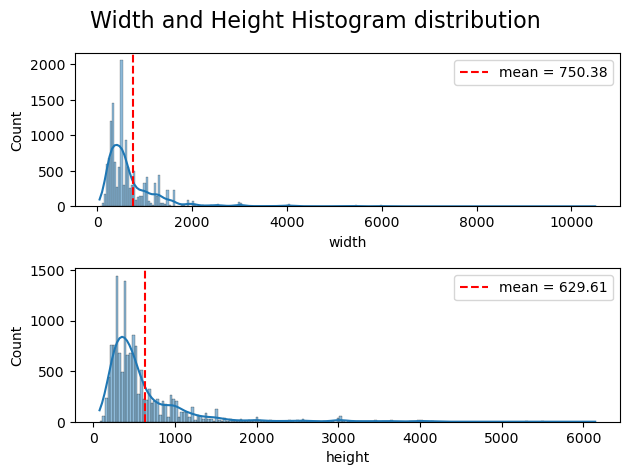

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2)
fig.suptitle('Width and Height Histogram distribution', fontsize=16)
sns.histplot(data=data_trashbox, x='width', ax=ax[0], kde=True)
sns.histplot(data=data_trashbox, x='height', ax=ax[1], kde=True)
mean_width = data_trashbox.mean()['width']
mean_height = data_trashbox.mean()['height']
ax[0].axvline(mean_width, c = 'r', ls='--', label=f'mean = {mean_width:.2f}')
ax[1].axvline(mean_height, c = 'r', ls='--', label=f'mean = {mean_height:.2f}')
# ax[0].set_title('Width')
# ax[1].set_title('Height')
ax[0].legend()
ax[1].legend()
fig.tight_layout()

## Model

In [142]:

train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)
train_data_generator = train_gen.flow_from_directory(train_path, target_size=target_size, class_mode='binary', batch_size=128)
test_data_generator = train_gen.flow_from_directory(test_path, target_size= target_size, class_mode='binary', batch_size=128)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [143]:
# class_names = train_data_generator.class_names
class_names = ['Organic', 'Recylable']

float32 (128, 224, 224, 3)
float32 (128,)


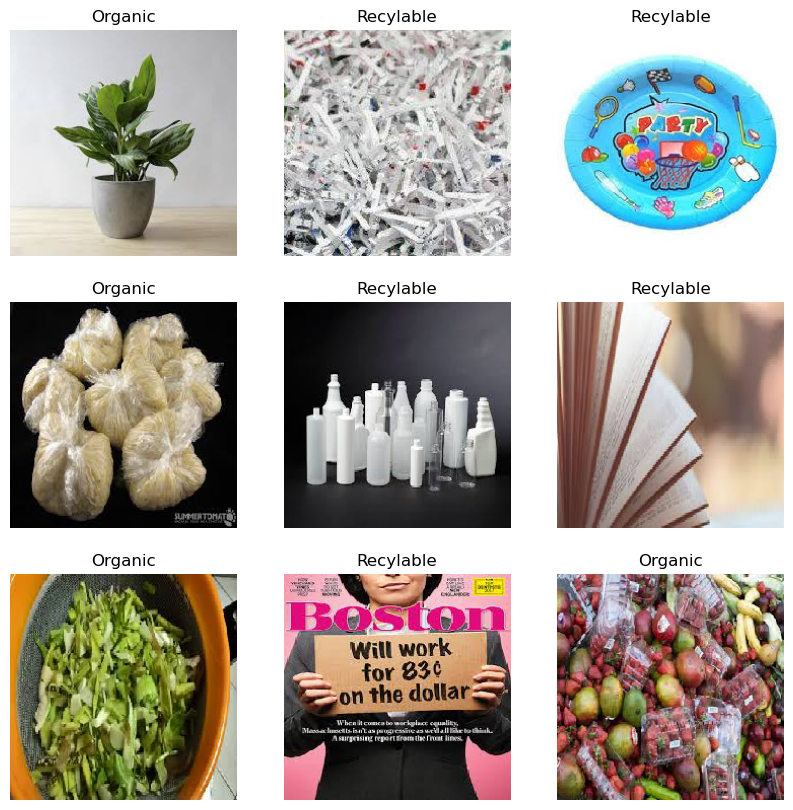

In [145]:
images, labels = next(train_data_generator)

print(images.dtype, images.shape)
print(labels.dtype, labels.shape)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [86]:
trained_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(150,150,3)
)
trained_model.trainable= False

In [87]:
model = tf.keras.models.Sequential([trained_model,
                                    # tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPool2D(),
                                    # tf.keras.layers.Conv2D(264, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPool2D(),
                                    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPool2D(),
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPool2D(),
                                    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dense_34 (Dense)            (None, 128)               6553728   
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 30,118,657
Trainable params: 6,553,857
Non-trainable params: 23,564,800
_________________________________________________________________


In [60]:

hist = model.fit(train_data_generator, epochs=5, validation_data=test_data_generator)

Epoch 1/5
177/177 [==============================] - 723s 4s/step - loss: 0.3809 - accuracy: 0.8997 - val_loss: 0.2759 - val_accuracy: 0.8886
Epoch 2/5
177/177 [==============================] - 748s 4s/step - loss: 0.1500 - accuracy: 0.9417 - val_loss: 0.2654 - val_accuracy: 0.8989
Epoch 3/5
177/177 [==============================] - 756s 4s/step - loss: 0.1034 - accuracy: 0.9585 - val_loss: 0.2758 - val_accuracy: 0.9125
Epoch 4/5
177/177 [==============================] - 753s 4s/step - loss: 0.0739 - accuracy: 0.9683 - val_loss: 0.3913 - val_accuracy: 0.8949
Epoch 5/5
177/177 [==============================] - 736s 4s/step - loss: 0.0571 - accuracy: 0.9750 - val_loss: 0.3891 - val_accuracy: 0.8945


In [83]:
model.save('resnet50_5epoch_v0.2.h5')
model.save('resnet50_5epoch_v0.1/')
model.save_weights('weightsv0.1.h5')

/Users/murali/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


KeyboardInterrupt: 

In [121]:

# images = np.vstack([x])
# test_data_generator = test_gen.flow_from_directory(test_path)

# test_data = tf.keras.preprocessing.image_dataset_from_directory(
#     test_path,
#     labels=None,
#     label_mode=None,
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(150, 150),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False,
# )


loaded_model1 = tf.keras.models.load_model('resnet50_5epoch_v0.1.h5')
loaded_model2 = tf.keras.models.load_model('resnet50_5epoch_v0.2.h5')
loaded_model3 = tf.keras.models.load_model('resnet50_5epoch_v0.1')
loaded_model4 = model
loaded_model4.load_weights('weightsv0.1.h5')

In [125]:
test_path = 'DATASET/TRAIN/R/R_20.jpg'

# test_gen = ImageDataGenerator(rescale=1/255.)
img = tf.keras.utils.load_img(
    test_path,
    grayscale=False,
    color_mode='rgb',
    target_size=(150, 150),
    interpolation='nearest'
)

img_arr = tf.keras.utils.img_to_array(
    img 
)

img_arr = img_arr/255.
import numpy as np
x = np.expand_dims(img_arr, axis=0)

In [126]:
img_arr.shape, x.shape

((150, 150, 3), (1, 150, 150, 3))

In [127]:
predictions1 = loaded_model1.predict(x)
predictions2 = loaded_model2.predict(x)
predictions3 = loaded_model3.predict(x)
predictions4 = loaded_model4.predict(x)
predictions5 = model.predict(x)

In [128]:
import numpy as np
print(np.count_nonzero(predictions1>0.5), np.count_nonzero(predictions1<0.5))
print(np.count_nonzero(predictions2>0.5), np.count_nonzero(predictions2<0.5))
print(np.count_nonzero(predictions3>0.5), np.count_nonzero(predictions3<0.5))
print(np.count_nonzero(predictions4>0.5), np.count_nonzero(predictions4<0.5))
print(np.count_nonzero(predictions5>0.5), np.count_nonzero(predictions5<0.5))

1 0
0 1
1 0
1 0
1 0
